## Gaussian Processes

A Gaussian Process (GP) is a collection of random variables, any finite number of which have a joint Gaussian distribution. In machine learning, Gaussian Processes are often used for regression, classification, and optimization tasks. They are particularly useful for modeling complex, high-dimensional functions where the functional form is unknown or difficult to specify.

### Basic Idea

The basic idea behind Gaussian Processes is to assume that the function you're trying to learn has some smoothness properties. Given a set of input-output pairs $(x_1, y_1), (x_2, y_2), \ldots, (x_n, y_n)$, a Gaussian Process uses these to make predictions $y^*$ for new input points $x^*$.

### Mathematical Formulation

A Gaussian Process is fully specified by a mean function $m(x)$ and a covariance function $k(x, x')$:

$
GP(m(x), k(x, x'))
$

The mean function $m(x)$ is often set to zero for simplicity, and the focus is usually on the covariance function $k(x, x')$, which encodes our assumptions about the function we're trying to learn. The most commonly used covariance function is the Radial Basis Function (RBF) or Gaussian kernel:

$
k(x, x') = \sigma^2 \exp\left(-\frac{(x - x')^2}{2l^2}\right)
$

Here, $\sigma^2$ is the signal variance and $l$ is the length scale.

### Prediction

To make predictions, you would use the Gaussian Process posterior, which is also a Gaussian distribution. Given some observed data $D = \{(x_i, y_i)\}_{i=1}^n$ and a new input $x^*$, the posterior distribution of $y^*$ is Gaussian with mean $\mu(x^*)$ and variance $\sigma^2(x^*)$, which can be computed using the kernel matrix and the observed data.

### Advantages and Disadvantages

**Advantages:**

1. Non-parametric: GPs can model a wide range of functions.
2. Uncertainty Estimates: GPs provide a measure of uncertainty along with predictions.
3. Flexibility: Different kernels can be used to model different types of data.

**Disadvantages:**

1. Computational Cost: The computational complexity is $O(n^3)$ for $n$ data points, which makes it less suitable for large datasets.
2. Hyperparameter Sensitivity: The choice of kernel and its parameters can strongly influence performance.

### Applications

1. Regression and Classification
2. Time-series forecasting
3. Bayesian optimization
4. Sensor networks
5. Robotics



### Example 1: Gaussian Process for Regression

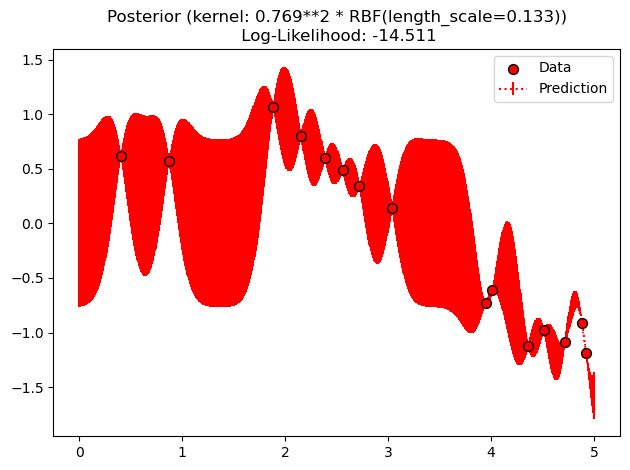

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# Generate synthetic data
rng = np.random.default_rng(seed=4)
X = np.sort(5 * rng.random(15))[:, np.newaxis]
y = np.sin(X).ravel()
y += 0.1 * rng.normal(size=X.shape[0])  # Add noise

# Define kernel (RBF kernel with constant term)
kernel = C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2))

# Create GaussianProcessRegressor object
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

# Fit the GP model
gp.fit(X, y)

# Predict for new data points
x_pred = np.atleast_2d(np.linspace(0, 5, 1000)).T
y_pred, sigma = gp.predict(x_pred, return_std=True)

# Plot the results
plt.figure()
plt.errorbar(x_pred.ravel(), y_pred, sigma, fmt='r:', label='Prediction')
plt.scatter(X.ravel(), y, c='r', s=50, zorder=10, edgecolors=(0, 0, 0), label='Data')
plt.title("Posterior (kernel: %s)\n Log-Likelihood: %.3f"
          % (gp.kernel_, gp.log_marginal_likelihood(gp.kernel_.theta)),
          fontsize=12)
plt.tight_layout()
plt.legend()

plt.show()


The expression `kernel = C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2))` defines a composite kernel for the Gaussian Process in `scikit-learn`. Let's break it down:

1. **RBF Kernel (Radial Basis Function or Gaussian Kernel)**:
   - Defined as: $ k(x, x') = \exp\left(-\frac{\|x - x'\|^2}{2l^2}\right) $
   - It has a parameter $ l $ which is the length scale. The length scale determines how sensitive the kernel is to changes in input space. A small length scale means that the function values can change quickly, leading to a "wiggly" function. A large length scale results in a smoother function.
   - In the code, `RBF(1.0, (1e-2, 1e2))` initializes the RBF kernel with a length scale of 1.0. The tuple `(1e-2, 1e2)` provides a constraint on the length scale during optimization, meaning it will be optimized within the range [0.01, 100].

2. **Constant Kernel (C)**:
   - Defined as: $ k(x, x') = c^2 $
   - It has a parameter $ c $ which scales the magnitude of the covariance. This can be thought of as a vertical scaling of the function.
   - In the code, `C(1.0, (1e-3, 1e3))` initializes the constant kernel with a value of 1.0. The tuple `(1e-3, 1e3)` provides a constraint on the constant term during optimization, meaning it will be optimized within the range [0.001, 1000].

3. **Composite Kernel**:
   - The `*` operator between the two kernels means that the kernels are multiplied together. This results in a new kernel function that combines the properties of both.
   - The composite kernel is defined as: $ k(x, x') = c^2 \times \exp\left(-\frac{\|x - x'\|^2}{2l^2}\right) $

### What happens during GP fitting?

When you fit a Gaussian Process with this composite kernel to data:

1. The GP will try to optimize the hyperparameters $ c $ and $ l $ to best fit the data. This optimization is done within the bounds provided.
   
2. The composite kernel will compute the similarity between data points considering both the RBF and constant terms. The RBF part captures the shape or structure of the function, while the constant part scales its magnitude.

3. The resulting GP regression model will have properties influenced by both kernels. The RBF part will determine how "wiggly" or smooth the function is, and the constant part will determine its vertical scale.


### Interpreting the Output of the Kernel Function:

In the context of Gaussian Processes, the kernel function measures the similarity or covariance between data points:

1. **High Value**: If the kernel function outputs a high value for two data points, it means the GP believes those points should have similar outputs. In the context of our regression example, it means the GP believes the function values at those points should be close.

2. **Low or Near Zero Value**: If the kernel function outputs a low or near-zero value, it means the GP believes the outputs for those points are relatively independent.

3. **Hyperparameters**: The RBF kernel used in our example has a length scale parameter. A smaller length scale means the function values can change quickly, leading to a "wigglier" function. A larger length scale means the function changes more slowly, leading to a smoother function. The constant term in our kernel scales the overall magnitude of the covariance.

4. **Uncertainty (Sigma)**: The `sigma` values in the prediction represent the model's uncertainty about its predictions. Areas with more data points (and thus more information) will typically have lower uncertainty, while areas with fewer data points will have higher uncertainty.

In the plotted results, the GP regression provides not just a prediction (the mean of the posterior distribution) but also a measure of uncertainty. This is one of the strengths of Gaussian Processes: they provide a probabilistic measure of uncertainty along with predictions.

## Example 2: Gaussian Process for Classification (1D)
Gaussian Processes can also be used for classification tasks. Here's a simple example:

In this example, we generate some synthetic data for a binary classification problem. We then fit a Gaussian Process model to this data and make predictions for new data points.

These are simplified examples to get you started. In real-world applications, you would typically also perform hyperparameter tuning, cross-validation, and possibly use more complex kernels.

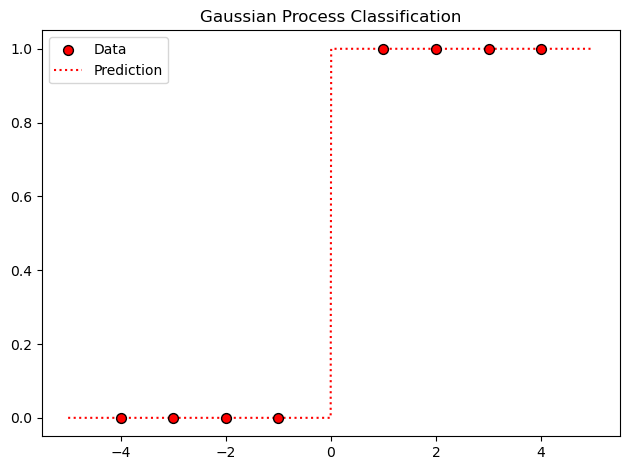

In [27]:
from sklearn.gaussian_process import GaussianProcessClassifier

# Generate synthetic data
X = np.array([-4, -3, -2, -1, 1, 2, 3, 4])[:, np.newaxis]
y = np.array([0, 0, 0, 0, 1, 1, 1, 1])

# Define kernel
kernel = 1.0 * RBF()

# Create GaussianProcessClassifier object
gp = GaussianProcessClassifier(kernel=kernel)

# Fit the GP model
gp.fit(X, y)

# Predict for new data points
x_pred = np.atleast_2d(np.linspace(-5, 5, 1000)).T
y_pred = gp.predict(x_pred)

# Plot the results
plt.figure()
plt.scatter(X.ravel(), y, c='r', s=50, zorder=10, edgecolors=(0, 0, 0), label='Data')
plt.plot(x_pred.ravel(), y_pred, 'r:', label='Prediction')
plt.title("Gaussian Process Classification")
plt.tight_layout()
plt.legend()

plt.show()


# Gaussian Processes In SLAM
In Simultaneous Localization and Mapping (SLAM) using Gaussian Processes (GPs), the core idea is to model the map of an environment as a Gaussian Process and simultaneously estimate the trajectory of the robot. This approach typically involves representing the environment's features or the robot's path as a continuous function over space, where the function values (e.g., the presence of an obstacle or the robot's location) at any point can be predicted using GP regression.

A Gaussian Process is defined by its mean function $m(\mathbf{x})$ and covariance function $k(\mathbf{x}, \mathbf{x}')$, where $\mathbf{x}$ and $\mathbf{x}'$ are points in the input space (e.g., positions in an environment). The GP prior is given by:

$ f(\mathbf{x}) \sim \mathcal{GP}(m(\mathbf{x}), k(\mathbf{x}, \mathbf{x}')) $

For SLAM, we often deal with estimating a function $f$ that represents the map or the robot's trajectory, based on noisy observations $\mathbf{y}$ at locations $\mathbf{X}$. The observations are related to the function values by some noise $\epsilon$, typically assumed to be Gaussian:

$ \mathbf{y} = f(\mathbf{X}) + \epsilon, \quad \epsilon \sim \mathcal{N}(0, \sigma_n^2\mathbf{I}) $

Given a set of $N$ training points $\mathbf{X}$ and their corresponding observations $\mathbf{y}$, the goal is to predict the value of the function $f$ at a new set of points $\mathbf{X}_*$. The joint distribution of the observed outputs $\mathbf{y}$ and the function values $f_*$ at the new points $\mathbf{X}_*$ under the GP model is:

$
\begin{bmatrix}
\mathbf{y} \\
f_*
\end{bmatrix}
\sim \mathcal{N} \left(
\mathbf{0},
\begin{bmatrix}
K(\mathbf{X}, \mathbf{X}) + \sigma_n^2\mathbf{I} & K(\mathbf{X}, \mathbf{X}_*) \\
K(\mathbf{X}_*, \mathbf{X}) & K(\mathbf{X}_*, \mathbf{X}_*)
\end{bmatrix}
\right)
$

where $K(\mathbf{X}, \mathbf{X})$ is the covariance matrix computed using the covariance function $k(\mathbf{x}, \mathbf{x}')$ for all pairs of training points, $K(\mathbf{X}, \mathbf{X}_*)$ is the covariance matrix between the training points and the new points, and $\sigma_n^2$ is the variance of the observation noise.

The prediction for $f_*$ at the new points $\mathbf{X}_*$, given the observations $\mathbf{y}$, follows a Gaussian distribution with the posterior mean and covariance given by:

$ \mathbb{E}[f_*|\mathbf{X}, \mathbf{y}, \mathbf{X}_*] = K(\mathbf{X}_*, \mathbf{X})[K(\mathbf{X}, \mathbf{X}) + \sigma_n^2\mathbf{I}]^{-1}\mathbf{y} $

$ \text{Cov}[f_*|\mathbf{X}, \mathbf{y}, \mathbf{X}_*] = K(\mathbf{X}_*, \mathbf{X}_*) - K(\mathbf{X}_*, \mathbf{X})[K(\mathbf{X}, \mathbf{X}) + \sigma_n^2\mathbf{I}]^{-1}K(\mathbf{X}, \mathbf{X}_*) $

This formulation allows for the prediction of environmental features or robot locations with an associated measure of uncertainty, which is crucial for robust SLAM in uncertain environments.